In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import pairwise_distances_argmin



In [36]:
np.random.seed(42)

In [37]:
df_b=pd.read_csv('df_behaviour.csv',delimiter=',')
df_d=pd.read_csv('df_demo.csv',delimiter=',')
df_p=pd.read_csv('df_psy.csv',delimiter=',')

# BEHAVIOUR SEGMENT

In [38]:
df_b.set_index('customer_id',inplace=True)

In [39]:
metric_features_b=df_b.columns

In [40]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_b)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_b, cluster_labels)
    avg_silhouette.append(silhouette_avg)


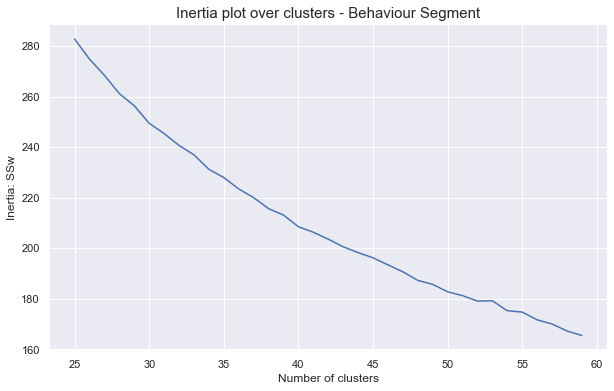

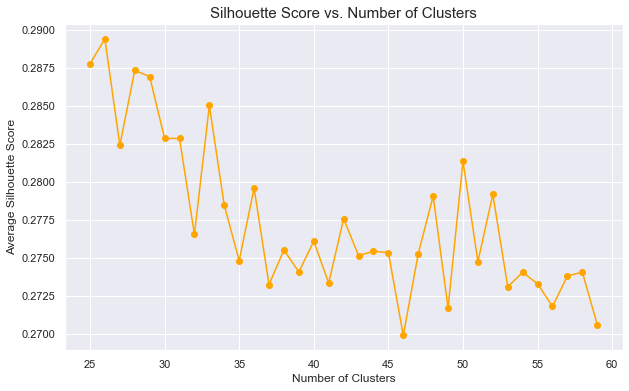

In [41]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Behaviour Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=26, random_state=42)
kmeans_labels = kmeans.fit_predict(df_b)
centroids_b = kmeans.cluster_centers_

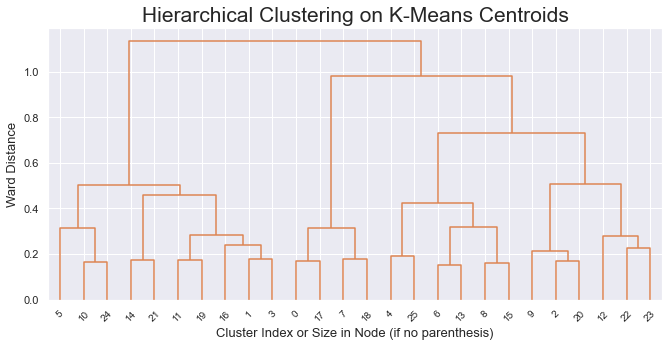

In [18]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_b)

# Prepare variables
n_samples = len(centroids_b)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [43]:
hclust = AgglomerativeClustering(
    n_clusters=5,  # Specify the desired number of clusters
    linkage="ward"
)
hierarchical_labels_b = hclust.fit_predict(centroids_b)
final_labels_b = np.zeros(len(df_b), dtype=int)
for i in range(len(df_b)):
    point = df_b.iloc[i].values.reshape(1, -1)
    nearest_centroid = pairwise_distances_argmin(point, centroids_b)[0]
    final_labels_b[i] = hierarchical_labels_b[nearest_centroid]

In [47]:
df_b['cluster'] = final_labels_b

In [49]:
silhouette_avg_b = silhouette_score(df_b, final_labels_b)
print("The average silhouette score is :", silhouette_avg_b)

The average silhouette score is : 0.7687445897027532


# Demographic Segment

In [50]:
df_d.set_index('customer_id',inplace=True)

In [21]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_d[['customer_age']])

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_d[['customer_age']], cluster_labels)
    avg_silhouette.append(silhouette_avg)

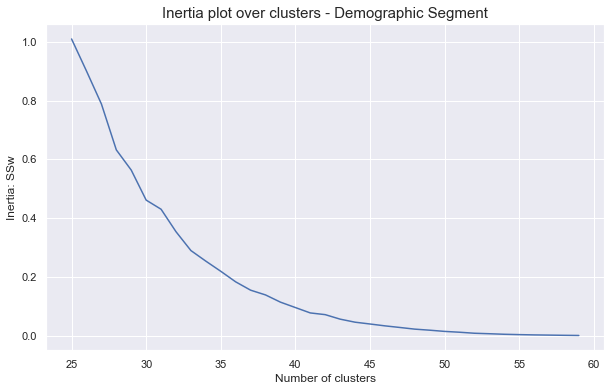

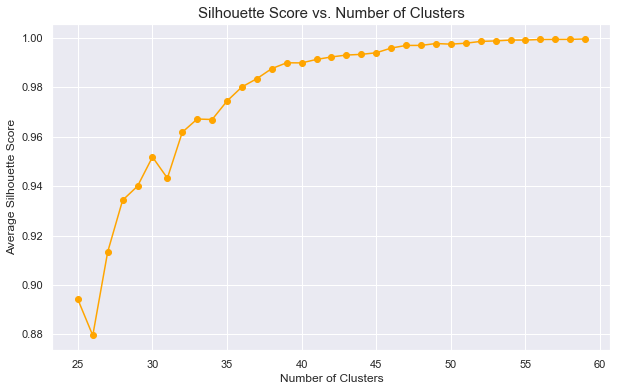

In [22]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Demographic Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [29]:
kmeans = KMeans(n_clusters=35, random_state=42)
kmeans_labels = kmeans.fit_predict(df_d)
centroids_d = kmeans.cluster_centers_

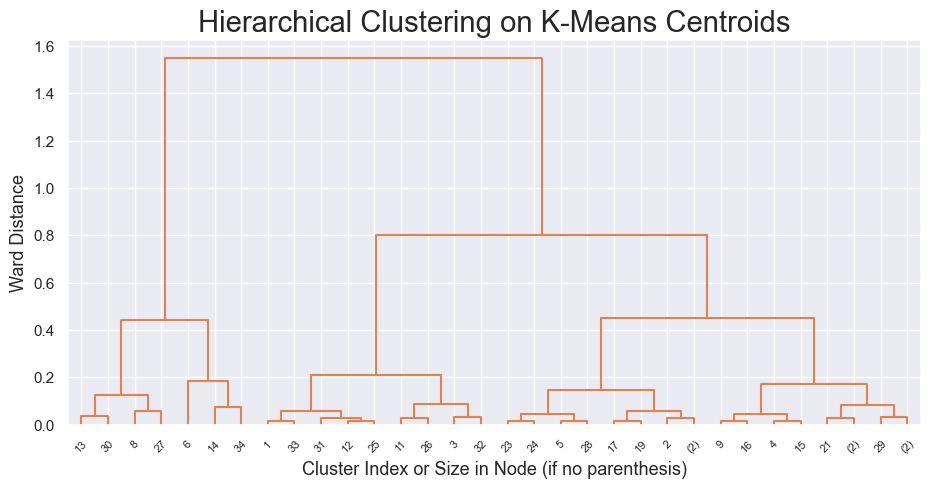

In [60]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_d)

# Prepare variables
n_samples = len(centroids_d)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [64]:
hclust = AgglomerativeClustering(
    n_clusters=4,  # Specify the desired number of clusters
    linkage="ward"
)
hierarchical_labels_d = hclust.fit_predict(centroids_d)
final_labels_d = np.zeros(len(df_d), dtype=int)
for i in range(len(df_d)):
    point = df_d[['customer_age']].iloc[i].values.reshape(1, -1)
    nearest_centroid = pairwise_distances_argmin(point, centroids_d)[0]
    final_labels_d[i] = hierarchical_labels_d[nearest_centroid]

In [65]:
df_d['cluster'] = final_labels_d

In [66]:
silhouette_avg_d = silhouette_score(df_d, final_labels_d)
print("The average silhouette score is :", silhouette_avg_d)

The average silhouette score is : 0.9560731839194718


# Psychographic Segment

In [68]:
df_p.set_index('customer_id',inplace=True)

In [69]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_p)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_p, cluster_labels)
    avg_silhouette.append(silhouette_avg)

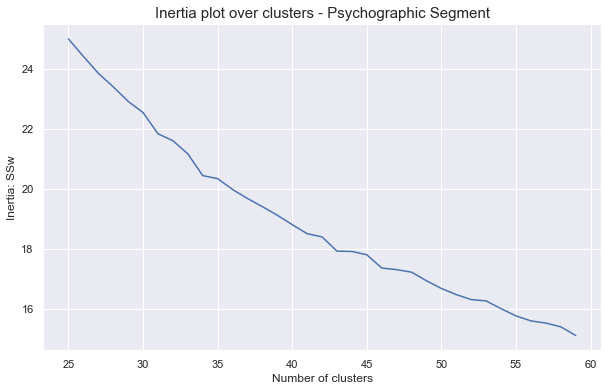

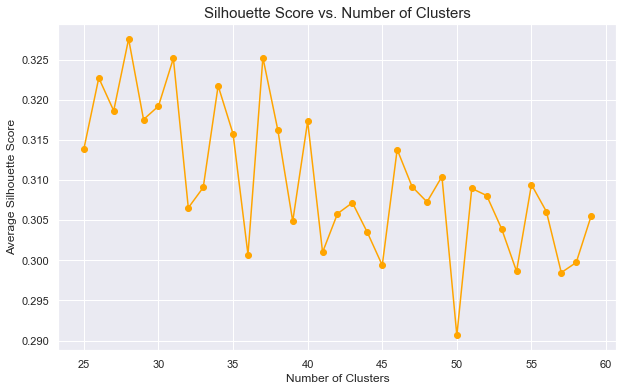

In [70]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Psychographic Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [71]:
kmeans = KMeans(n_clusters=28, random_state=42)
kmeans_labels = kmeans.fit_predict(df_p)
centroids_p = kmeans.cluster_centers_

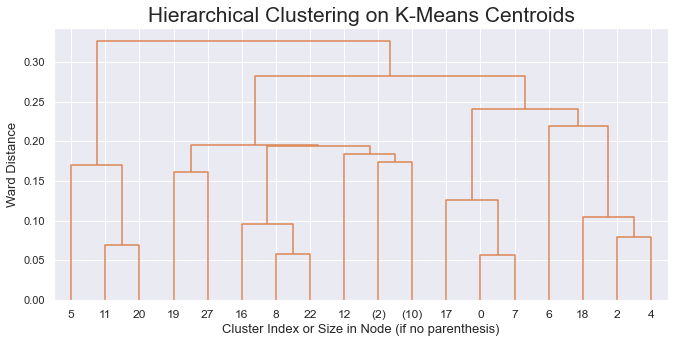

In [72]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_p)

# Prepare variables
n_samples = len(centroids_p)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [73]:
hclust = AgglomerativeClustering(
    n_clusters=6,  # Specify the desired number of clusters
    linkage="ward"
)
hierarchical_labels_p = hclust.fit_predict(centroids_p)
final_labels_p = np.zeros(len(df_p), dtype=int)
for i in range(len(df_p)):
    point = df_p.iloc[i].values.reshape(1, -1)
    nearest_centroid = pairwise_distances_argmin(point, centroids_p)[0]
    final_labels_p[i] = hierarchical_labels_d[nearest_centroid]

In [74]:
df_p['cluster'] = final_labels_p

In [75]:
silhouette_avg_p = silhouette_score(df_p, final_labels_p)
print("The average silhouette score is :", silhouette_avg_p)

The average silhouette score is : 0.9314832173341584


# Results

In [76]:
silhouette_scores = [silhouette_avg_b, silhouette_avg_d, silhouette_avg_p]

segments = ['Behaviour', 'Demographic', 'Psychographic']

table = pd.DataFrame({
    'Segment': segments,
    'Silhouette Score': silhouette_scores
})

print(table)

         Segment  Silhouette Score
0      Behaviour          0.768745
1    Demographic          0.956073
2  Psychographic          0.931483
